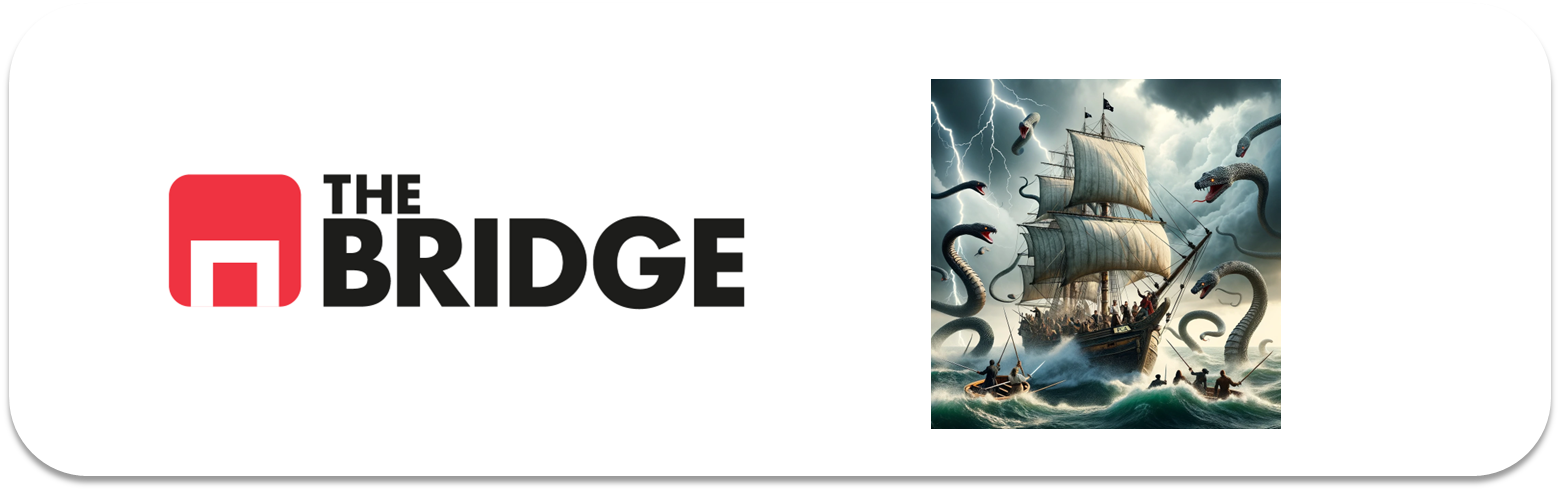

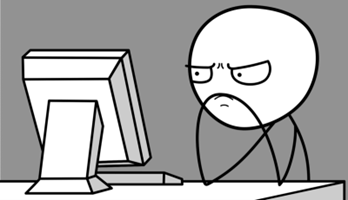

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Librerias Bootcamp (Data Science - The Bridge Oct24')
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
np.random.seed(42)

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv("./data/nutrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [3]:
df.head(5)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [4]:
tml.describe_df(df)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,ID,int64,0.000000,8618,100.000000
1,FoodGroup,object,0.000000,25,0.290091
2,ShortDescrip,object,0.000000,8614,99.953586
3,Descrip,object,0.000000,8618,100.000000
4,CommonName,object,87.665352,443,5.140404
5,MfgName,object,81.898352,92,1.067533
6,ScientificName,object,91.506150,469,5.442098
7,Energy_kcal,float64,0.000000,666,7.728011
8,Protein_g,float64,0.000000,2642,30.656765
9,Fat_g,float64,0.000000,2405,27.906707


In [5]:
tml.tipifica_variables(df,26,0.1)

,nombre_variable,tipo_sugerido
0,ID,Numérica Continua
1,FoodGroup,Categórica
2,ShortDescrip,Numérica Continua
3,Descrip,Numérica Continua
4,CommonName,Numérica Discreta
5,MfgName,Numérica Discreta
6,ScientificName,Numérica Discreta
7,Energy_kcal,Numérica Discreta
8,Protein_g,Numérica Continua
9,Fat_g,Numérica Continua


In [6]:
features_num = df.describe().columns.to_list()
features_num

['ID',
 'Energy_kcal',
 'Protein_g',
 'Fat_g',
 'Carb_g',
 'Sugar_g',
 'Fiber_g',
 'VitA_mcg',
 'VitB6_mg',
 'VitB12_mcg',
 'VitC_mg',
 'VitE_mg',
 'Folate_mcg',
 'Niacin_mg',
 'Riboflavin_mg',
 'Thiamin_mg',
 'Calcium_mg',
 'Copper_mcg',
 'Iron_mg',
 'Magnesium_mg',
 'Manganese_mg',
 'Phosphorus_mg',
 'Selenium_mcg',
 'Zinc_mg',
 'VitA_USRDA',
 'VitB6_USRDA',
 'VitB12_USRDA',
 'VitC_USRDA',
 'VitE_USRDA',
 'Folate_USRDA',
 'Niacin_USRDA',
 'Riboflavin_USRDA',
 'Thiamin_USRDA',
 'Calcium_USRDA',
 'Copper_USRDA',
 'Magnesium_USRDA',
 'Phosphorus_USRDA',
 'Selenium_USRDA',
 'Zinc_USRDA']

### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

<Axes: >

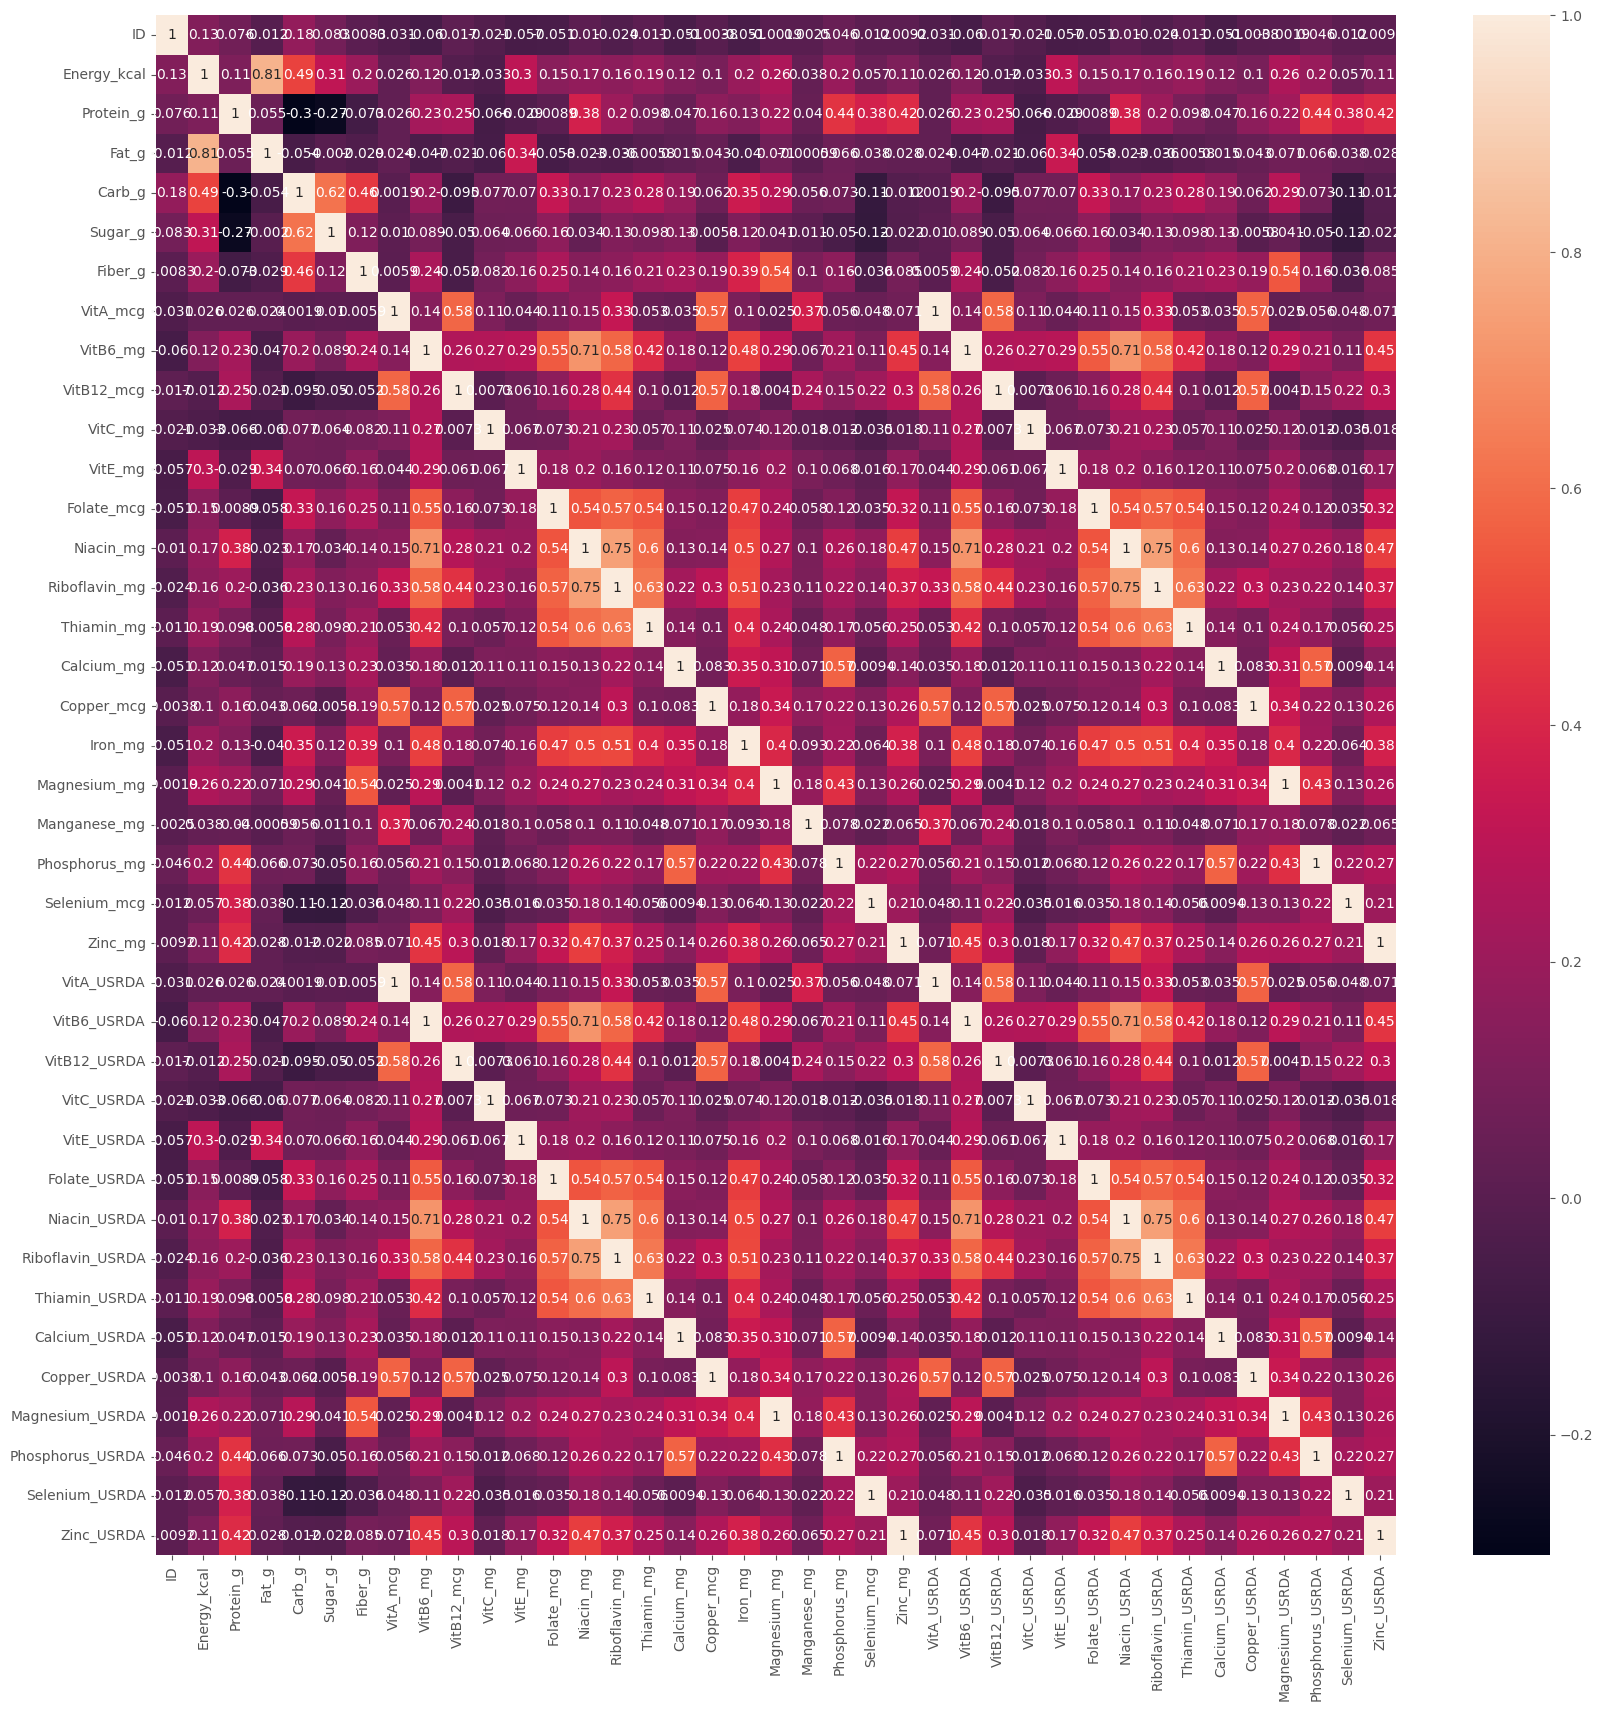

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df[features_num].corr(numeric_only=True), annot=True)

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [8]:
usrda_features = df.filter(like='USRDA').describe().T
usrda_features

,count,mean,std,min,25%,50%,75%,max
VitA_USRDA,8618.0,0.104410,0.865958,0.0,0.000000,0.001667,0.023333,33.333333
VitB6_USRDA,8618.0,0.155511,0.281538,0.0,0.020147,0.070588,0.208824,7.058824
VitB12_USRDA,8618.0,0.510525,1.799659,0.0,0.000000,0.033333,0.540625,41.204167
VitC_USRDA,8618.0,0.088060,0.639808,0.0,0.000000,0.000000,0.027778,26.666667
VitE_USRDA,8618.0,0.058155,0.256602,0.0,0.000000,0.007333,0.030000,9.960000
Folate_USRDA,8618.0,0.125765,0.466402,0.0,0.000000,0.017500,0.062500,14.702500
Niacin_USRDA,8618.0,0.213222,0.302161,0.0,0.023875,0.131250,0.314328,7.968750
Riboflavin_USRDA,8618.0,0.182499,0.346062,0.0,0.035385,0.115385,0.200000,13.461538
Thiamin_USRDA,8618.0,0.174881,0.431974,0.0,0.025000,0.064583,0.185833,19.479167
Calcium_USRDA,8618.0,0.061176,0.167803,0.0,0.007500,0.015833,0.051667,6.136667


In [9]:
df.drop(columns = df.columns[df.columns.str.contains('USRDA')], inplace=True)

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [10]:
df = df.select_dtypes(exclude=['object'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8618 non-null   int64  
 1   Energy_kcal    8618 non-null   float64
 2   Protein_g      8618 non-null   float64
 3   Fat_g          8618 non-null   float64
 4   Carb_g         8618 non-null   float64
 5   Sugar_g        8618 non-null   float64
 6   Fiber_g        8618 non-null   float64
 7   VitA_mcg       8618 non-null   float64
 8   VitB6_mg       8618 non-null   float64
 9   VitB12_mcg     8618 non-null   float64
 10  VitC_mg        8618 non-null   float64
 11  VitE_mg        8618 non-null   float64
 12  Folate_mcg     8618 non-null   float64
 13  Niacin_mg      8618 non-null   float64
 14  Riboflavin_mg  8618 non-null   float64
 15  Thiamin_mg     8618 non-null   float64
 16  Calcium_mg     8618 non-null   float64
 17  Copper_mcg     8618 non-null   float64
 18  Iron_mg 

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


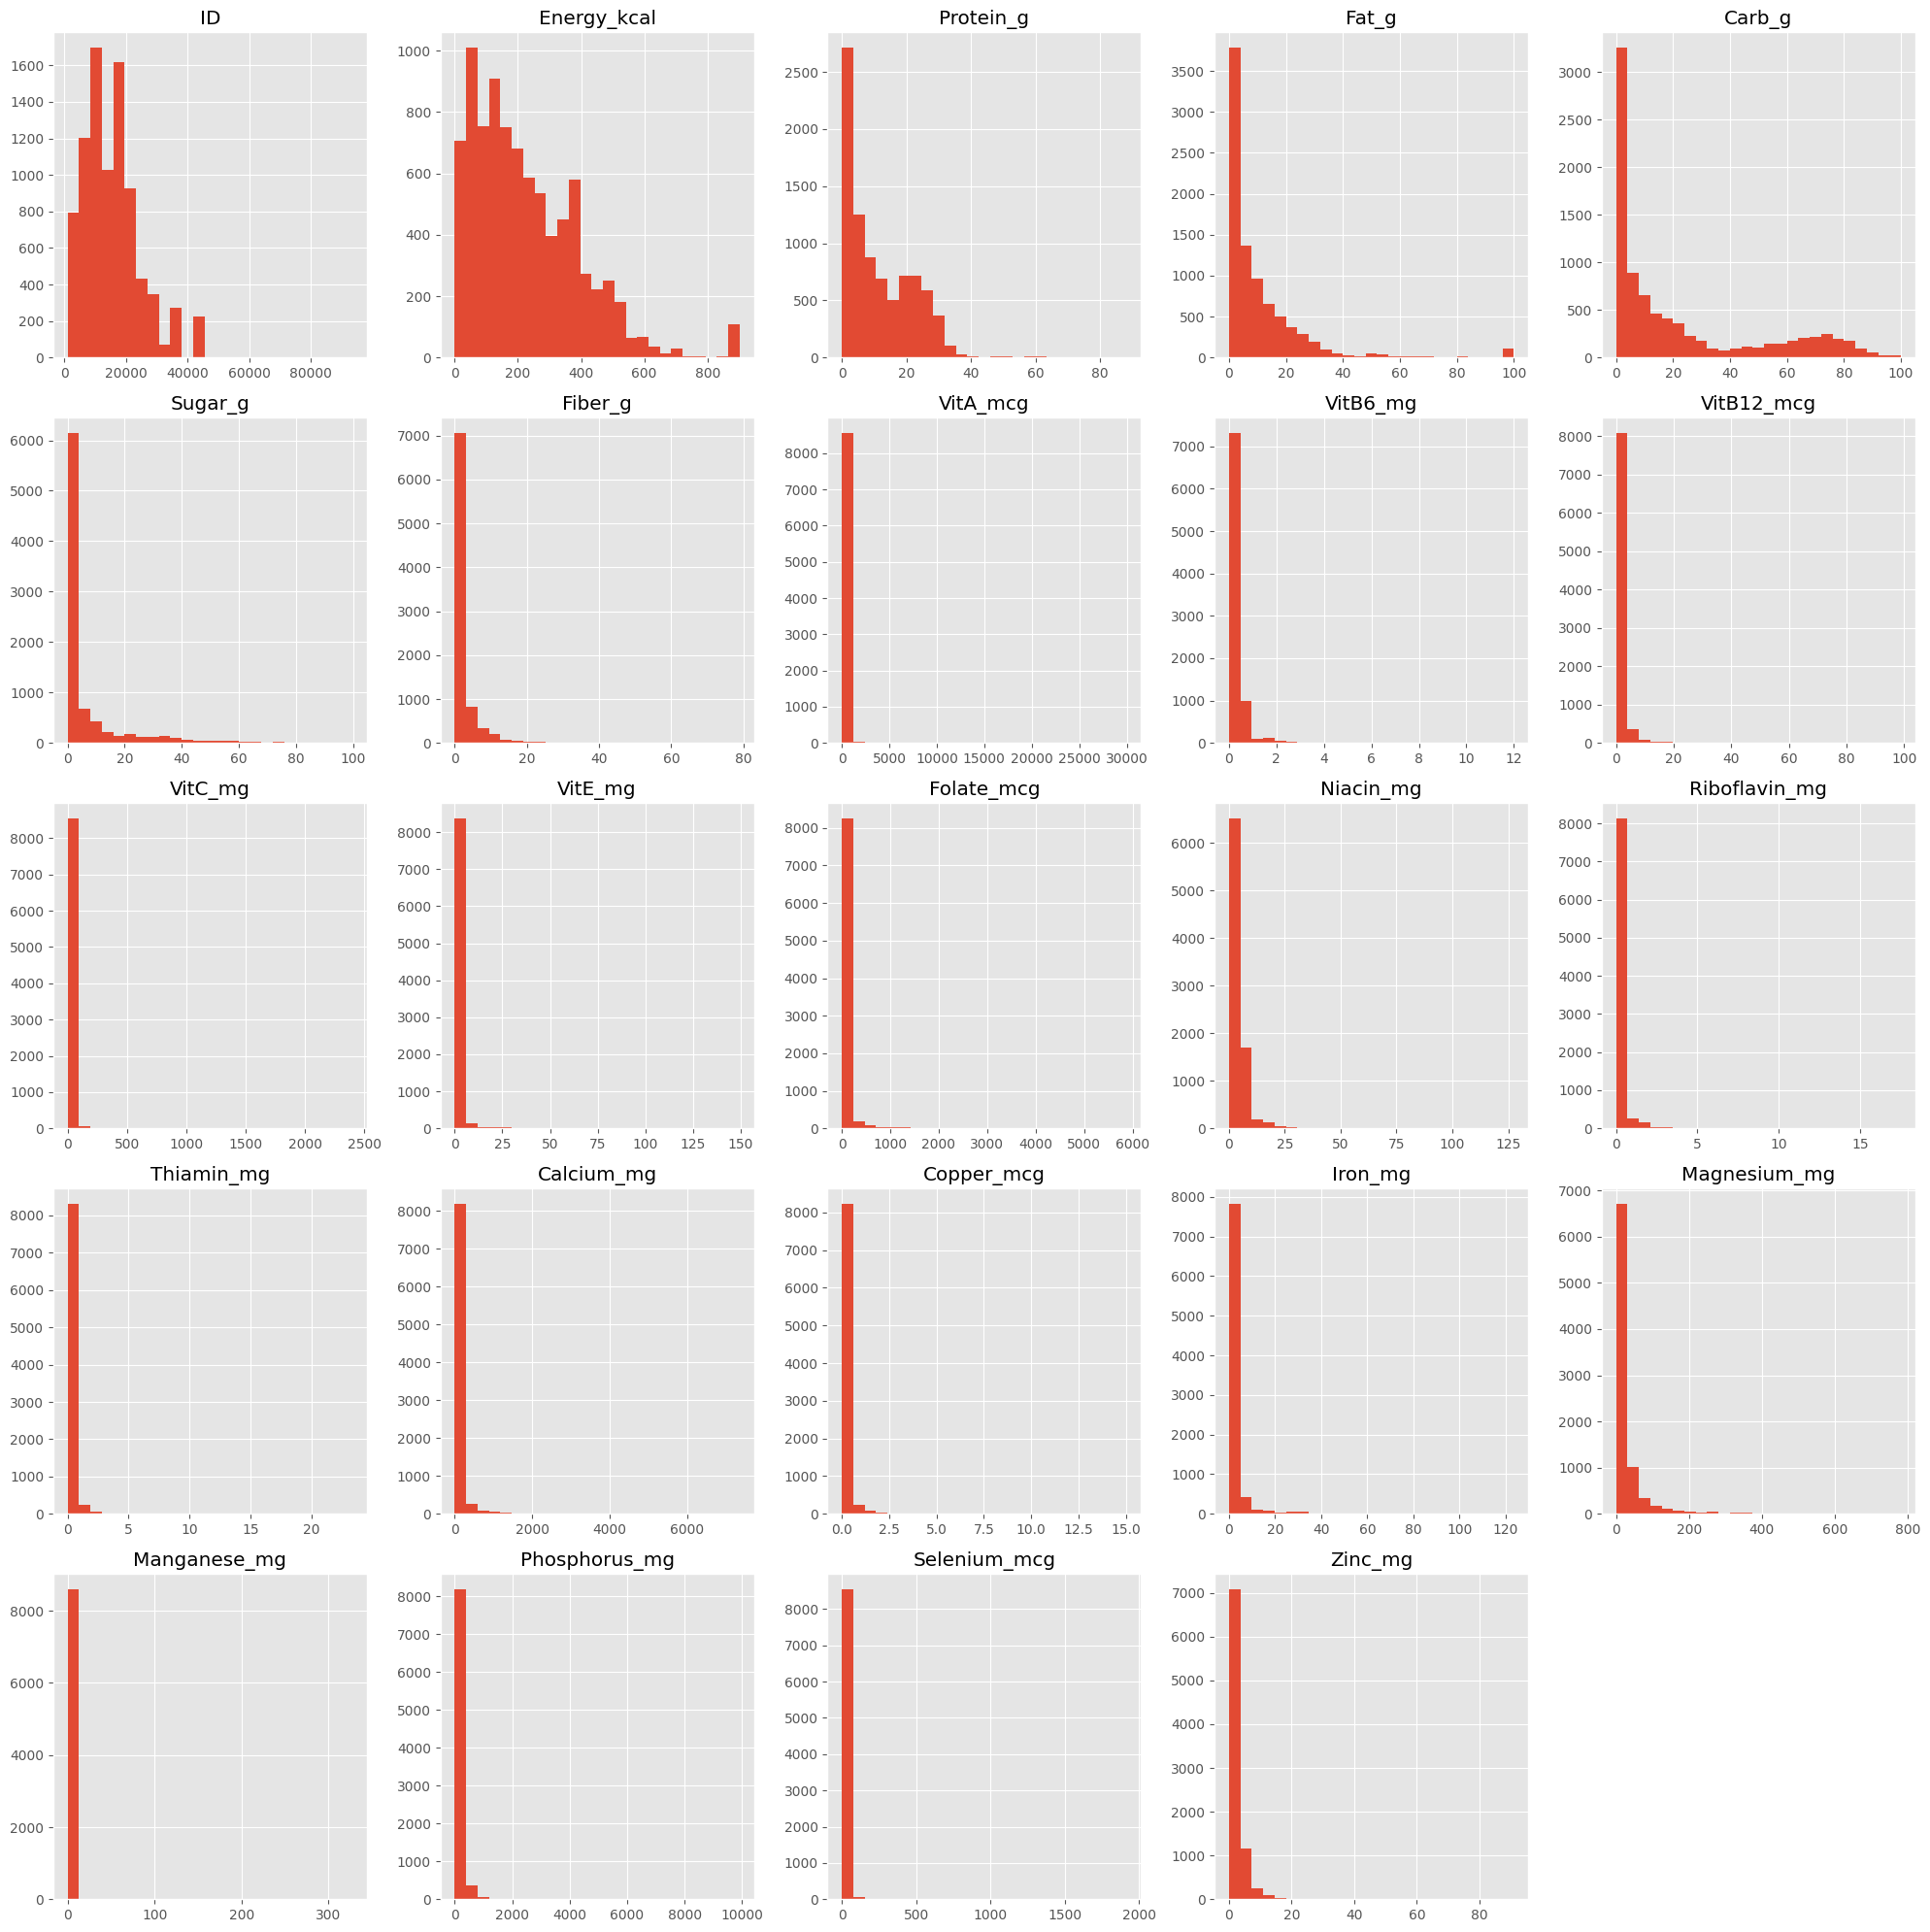

In [14]:
fig = df.hist(bins=25, figsize=(20,20))
plt.tight_layout()
plt.show()

In [15]:
df_log = np.log1p(df)

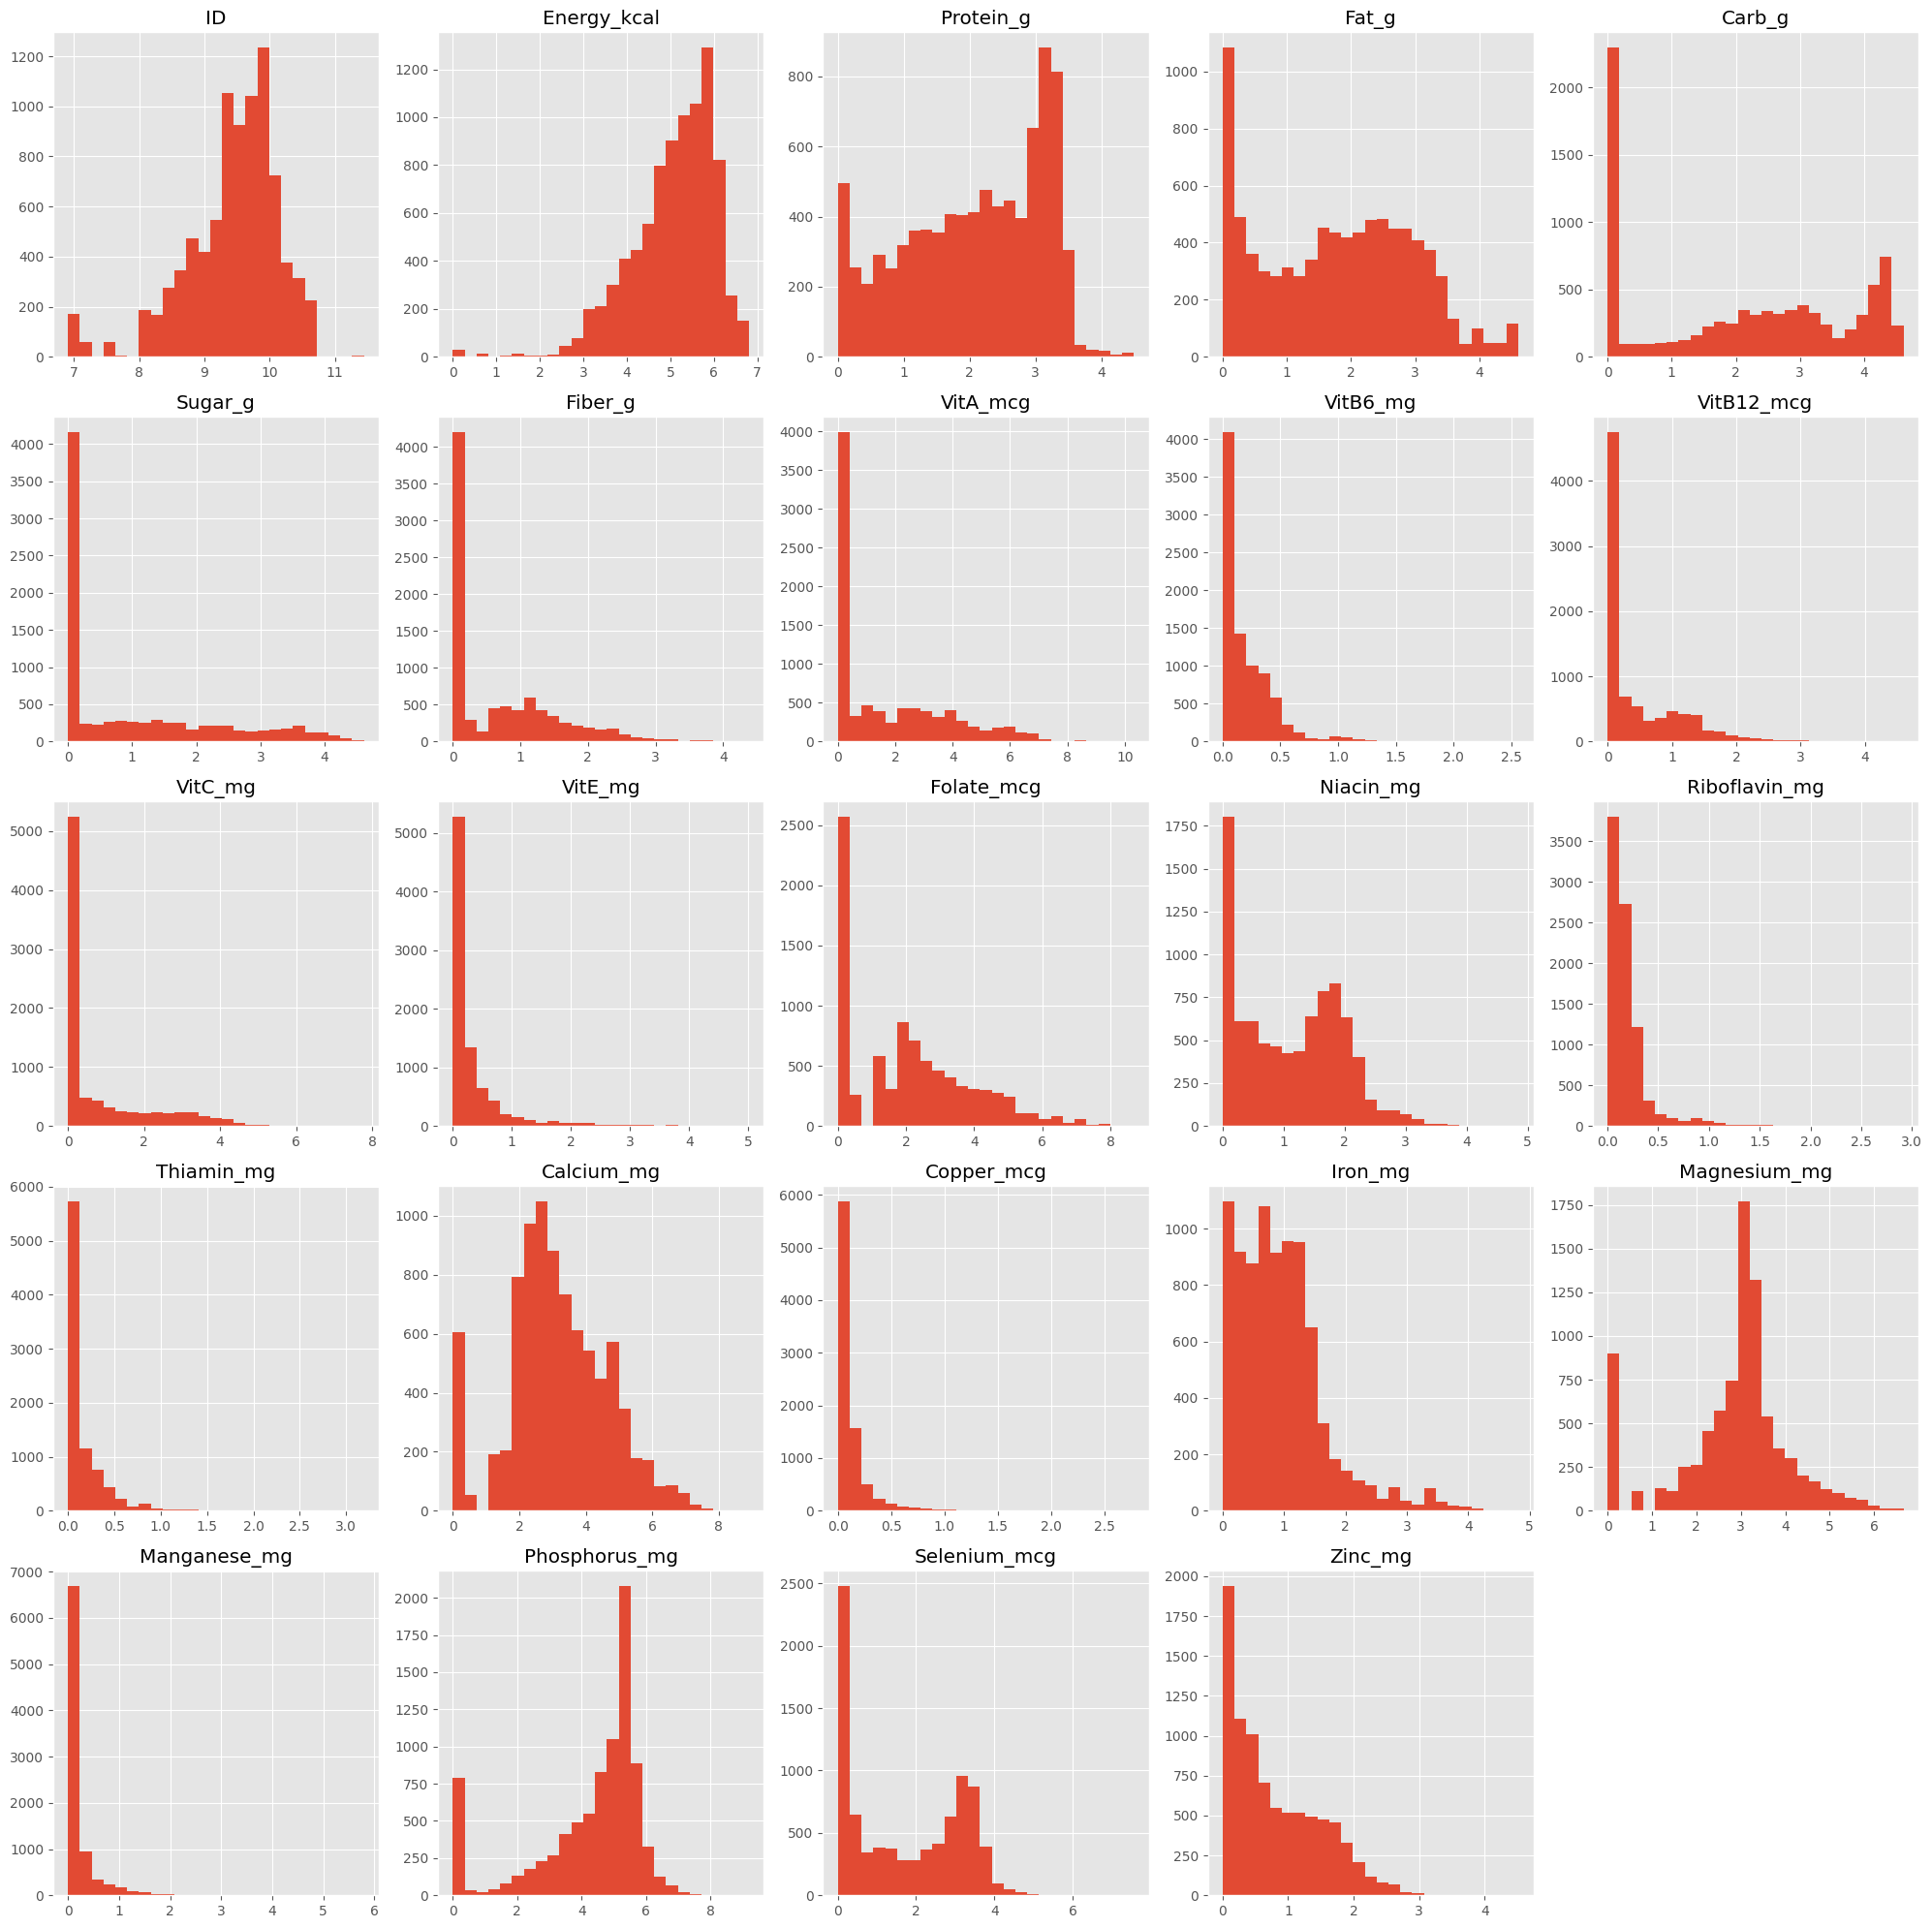

In [16]:
fig = df_log.hist(bins=25, figsize=(20,20))
plt.tight_layout()
plt.show()

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [17]:
scaler = StandardScaler()
df_log_scaled = scaler.fit_transform(df_log)

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [19]:
pca = PCA()
pca.fit(df_log_scaled)

PCA()

In [22]:
df_pca = pca.transform(df_log_scaled)
df_pca

array([[-2.25417175, -0.86428573, -0.06834311, ...,  0.05775248,
         0.0917867 , -0.87513533],
       [-2.22156616, -0.80594741, -0.04805735, ..., -0.01407012,
         0.08415267, -0.88207456],
       [-3.38127119, -1.03879853,  0.47454238, ...,  0.26490249,
         0.00622108, -0.84811257],
       ...,
       [-2.83858687,  1.57310846,  2.09259741, ..., -0.58889673,
        -0.57473268, -0.75412653],
       [ 1.20435469, -0.84984198, -0.12656547, ..., -0.89534384,
        -0.95436473,  0.23215234],
       [ 0.4660893 , -1.34540358, -0.81010173, ..., -0.62068788,
        -0.31047084, -0.68042552]])

In [23]:
pca.components_.shape

(24, 24)

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [24]:
pd.DataFrame(
    data = pca.components_,
    columns = df_log.columns,
    index = [f'PC{i}' for i in range(1, len(df_log.columns)+1)]
)

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.032367,0.198584,0.278323,0.148299,0.003324,-0.026548,0.074750,0.078557,0.262927,0.215070,...,0.266061,0.229306,0.153499,0.188096,0.281934,0.275511,0.138883,0.295566,0.247231,0.298881
PC2,-0.028502,0.004060,-0.242437,-0.150696,0.437320,0.319496,0.386601,0.112673,0.008667,-0.235833,...,0.073950,0.160847,0.205673,0.137013,0.124194,0.113003,0.258978,-0.061244,-0.224242,-0.158838
PC3,0.284692,0.476452,0.082978,0.406847,0.224346,0.167852,0.161450,-0.339077,-0.156937,-0.184268,...,-0.108421,0.063104,-0.116127,-0.032302,0.054483,-0.056105,0.041611,-0.012571,-0.070326,-0.038316
PC4,-0.052387,0.095551,-0.131332,0.072172,0.039933,0.291156,-0.086212,0.099846,0.301743,0.225246,...,0.347922,0.300073,-0.199361,-0.271181,0.116423,-0.324726,-0.327767,-0.229912,-0.161424,-0.029412
PC5,-0.377853,0.244618,-0.038596,0.411002,-0.064537,0.084570,-0.154488,0.420050,-0.112635,-0.005339,...,-0.063474,-0.188170,0.206827,0.017182,-0.165263,-0.036871,-0.030623,0.021880,0.087255,-0.044379
PC6,0.029334,-0.057591,-0.132409,0.034228,-0.197073,-0.229103,0.052457,-0.205555,0.151147,0.061783,...,-0.035552,-0.009428,-0.437210,0.404550,0.037595,-0.095885,0.349498,-0.272505,-0.076449,0.093758
PC7,0.810413,-0.045332,-0.033177,-0.018654,0.017405,0.140472,-0.044093,0.261338,-0.010875,0.183045,...,-0.127318,-0.226129,-0.002032,-0.033244,-0.082730,0.060682,-0.133441,0.065804,0.073864,-0.017463
PC8,0.061457,0.053836,0.005538,0.053950,0.062648,0.152158,-0.157511,0.195923,-0.218948,0.317769,...,0.208215,-0.144356,0.102759,0.571578,0.170901,-0.206272,0.083472,-0.139616,-0.118501,0.083390
PC9,0.181150,0.016634,-0.069448,0.049936,0.057378,-0.378061,-0.093674,0.465848,-0.120424,-0.173841,...,0.167839,0.321698,-0.195441,-0.005089,-0.035953,-0.171359,0.161590,-0.080005,0.091019,-0.335913
PC10,-0.140517,0.051521,-0.116787,-0.190302,0.157994,0.475516,-0.164311,-0.119499,-0.074300,0.086482,...,0.015996,-0.089862,-0.422596,0.130858,-0.206470,0.043581,-0.065051,0.020981,0.395488,0.041865


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29975904 0.45957353 0.54484638 0.61307248 0.6742703  0.71728901
 0.75255374 0.78202954 0.80755488 0.83164028 0.8533061  0.87413809
 0.89224372 0.90994708 0.92366311 0.93647302 0.94877238 0.95949426
 0.96873428 0.97735118 0.98447952 0.99096246 0.99638759 1.        ]


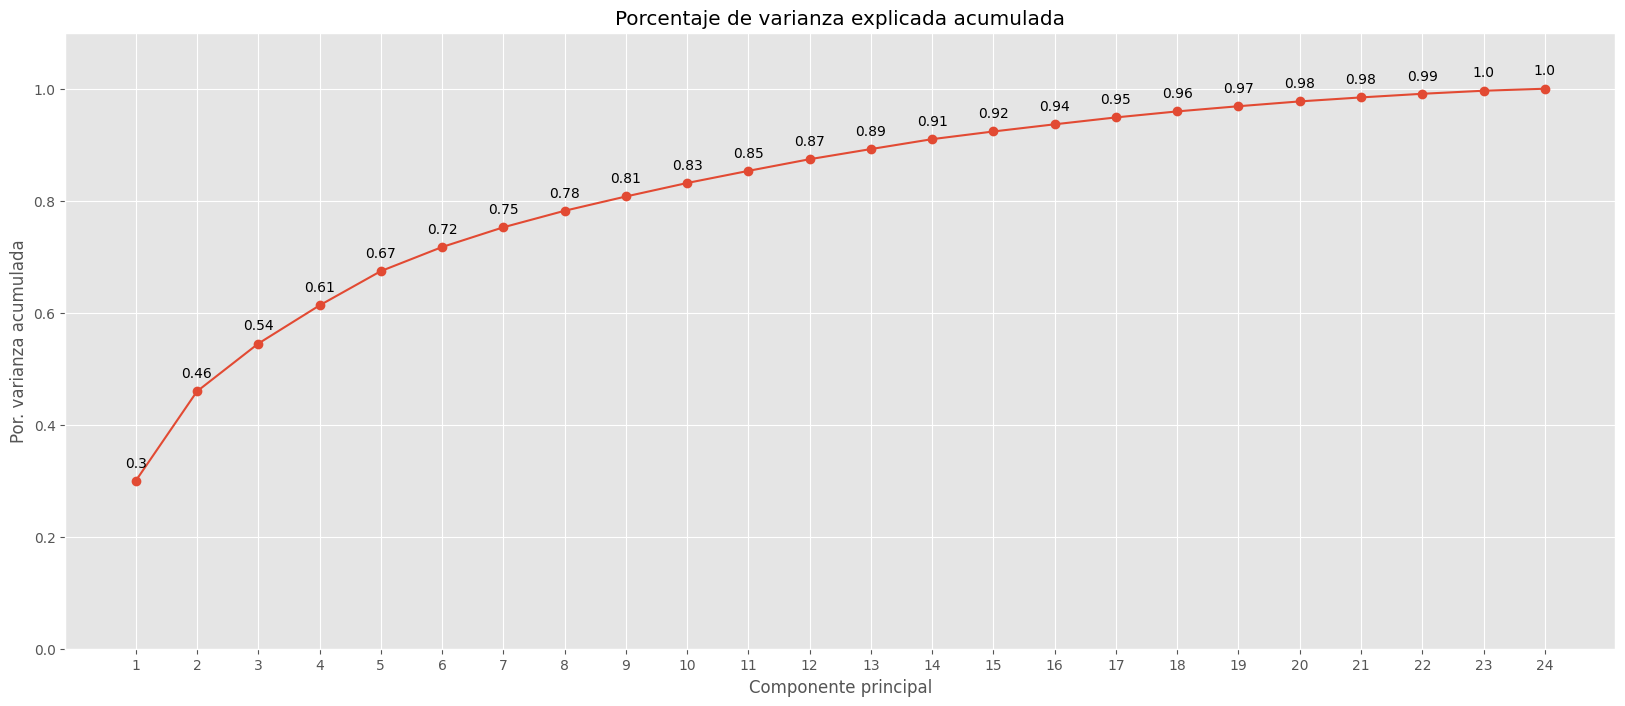

In [35]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
ax.plot(
    np.arange(len(df_log.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_log.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [43]:
prop_varianza_acum[5] # 0-5

0.7172890116423379

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [42]:
pca_6 = PCA(6)
pca_6.fit(df_log_scaled)
df_pca = pca_6.transform(df_log_scaled)

In [44]:
pca_6.components_.shape

(6, 24)

In [45]:
pca.explained_variance_

array([7.19505196, 3.83599268, 2.04678591, 1.63761657, 1.46891796,
       1.03256898, 0.84645161, 0.70750134, 0.61267931, 0.57811664,
       0.52004005, 0.50002568, 0.43458559, 0.42492997, 0.32922295,
       0.30747354, 0.29521887, 0.25735501, 0.22178626, 0.20682955,
       0.1710999 , 0.15560872, 0.1302183 , 0.08670783])

In [49]:
pd.DataFrame(data = df_pca, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.254172,-0.864286,-0.068343,0.725155,5.309627,0.278329
1,-2.221566,-0.805947,-0.048057,0.716533,5.282442,0.318619
2,-3.381271,-1.038799,0.474542,1.650204,5.350524,1.293928
3,1.409058,-1.152702,-1.430842,-0.616309,3.647042,-2.149937
4,1.123787,-1.093036,-1.326571,-0.858790,3.929694,-2.392220
...,...,...,...,...,...,...
8613,2.634748,-2.608909,-0.029272,-0.131149,1.358243,0.166788
8614,0.164336,-1.916526,-0.041448,-1.550799,-1.507404,-0.675810
8615,-2.838587,1.573108,2.092597,1.025720,-1.748049,-0.827460
8616,1.204355,-0.849842,-0.126565,-1.678178,0.347099,1.218577
